In [ ]:
 import pandas as pd
import os
import numpy as np
import cv2
from keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
import keras
from keras.layers import Conv2D,Activation,MaxPooling2D
#import keras_utils
from keras.layers import Concatenate
from keras import Input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras import models
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix,  plot_confusion_matrix,  ConfusionMatrixDisplay

In [ ]:
 data=np.load('/content/drive/MyDrive/data/data1.npy')
target=np.load('/content/drive/MyDrive/data/target1.npy')
print(data.shape)
print(target.shape)

(21759, 100, 100, 1)
(21759, 2)


In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)
print('train_data' , train_data.shape)
print('test_data' , test_data.shape)
print('train_data' , train_target.shape)
print('test_data' , test_target.shape)

train_data (17407, 100, 100, 1)
test_data (4352, 100, 100, 1)
train_data (17407, 2)
test_data (4352, 2)


In [ ]:
 input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
print(input_shape, inp)

(100, 100, 1) KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
convs=[]
 
parrallel_kernels=[3,5,7]
 
for k in range(len(parrallel_kernels)):
 
    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)
    print(conv)
 
out = Concatenate()(convs)
conv_model = Model(inp, out)
print(out)
print(conv_model)

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 128), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 128), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 128), dtype=tf.float32, name=None), name='conv2d_5/Relu:0', description="created by layer 'conv2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 384), dtype=tf.float32, name=None), name='concatenate_1/concat:0', description="created by layer 'concatenate_1'")


In [ ]:
 
convs=[]
 
parrallel_kernels=[3,5,7]
 
for k in range(len(parrallel_kernels)):
 
    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)
 
out = Concatenate()(convs)
conv_model = Model(inp, out)
 
model = Sequential()
model.add(conv_model)
 
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0

In [ ]:
 # Checkpoint
filepath="/content/drive/MyDrive/data/3layer.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
 #checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=70,callbacks=[checkpoint],validation_split=0.2)

In [ ]:
 # load the model
new_model = load_model("/content/drive/MyDrive/data/weights.best70.hdf5")
#assert_allclose(model.predict(x_train),
                #new_model.predict(x_train),
               # 1e-5)

In [ ]:
 
checkpoint = ModelCheckpoint('/content/drive/MyDrive/data/weights.best74.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=new_model.fit(train_data,train_target,epochs=4,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/4
436/436 [==============================] - 4737s 11s/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0082 - val_accuracy: 0.9980
Epoch 2/4
436/436 [==============================] - 4720s 11s/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0104 - val_accuracy: 0.9983
Epoch 3/4
436/436 [==============================] - 4723s 11s/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.0101 - val_accuracy: 0.9986
Epoch 4/4
436/436 [==============================] - 4730s 11s/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0100 - val_accuracy: 0.9977


In [ ]:
 new_model.save("/content/drive/MyDrive/data/weights.best74.pd")
print("Saved model to disk")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/data/weights.best74.pd/assets
Saved model to disk


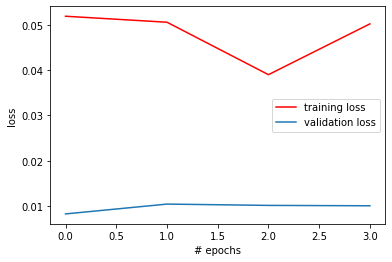

In [ ]:
 plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

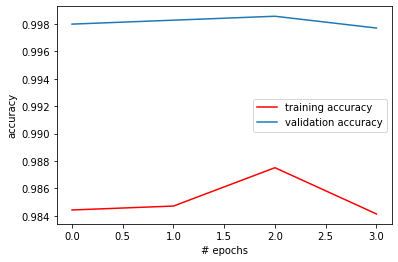

In [ ]:
 plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
Y_pred = new_model.fit.predict_generator(test_data) 
y_pred = np.argmax(Y_pred,  axis =1)

AttributeError: ignored

In [ ]:
 Y_pred = new_model.predict_generator(test_data) 
y_pred = np.argmax(Y_pred,  axis =1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


0.0
4352
4352
[[2116    8]
 [   2 2226]]
Classification_Report
              precision    recall  f1-score   support

         neg       1.00      1.00      1.00      2124
         pos       1.00      1.00      1.00      2228

    accuracy                           1.00      4352
   macro avg       1.00      1.00      1.00      4352
weighted avg       1.00      1.00      1.00      4352



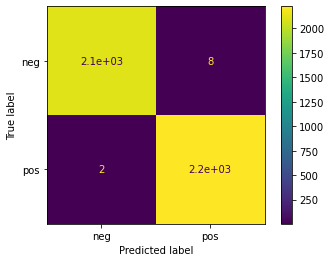

In [ ]:
 #print(type(y_pred))
true_lables=[]
target_names = ['neg', 'pos']
label_names = [0 , 1]
print(test_target[0][0])
print(len(test_target))
for item in range(len(test_target)):
  true_lables.append(test_target[item][1])
print(len(true_lables))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_lables,  y_pred,  labels = label_names) 
 
# print ('Confusion Matrix') 
print(confusion_matrix(true_lables,  y_pred))
 
print('Classification_Report') 
print(classification_report(true_lables,  y_pred, target_names = target_names)) 
 
disp = ConfusionMatrixDisplay(confusion_matrix = cm,  display_labels = target_names)
disk = disp.plot() 
plt.show()